# **N-gram Letter Prediction - Visualization**

Our goal is to analyze our letter prediction models to try to estimate how good they are performing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

First, load the data from the previous notebook:

In [8]:
with open('../data/out/probs.json') as f:
    data = json.load(f)

with open('../data/out/prefix-count.json') as f:
    prefix_count = json.load(f)

Now, add empty probabilities for all the alphabet letters that are not included for the prefix. In this way, we have an uniform size of dictionary to be able to create graphs.

In [9]:
for prefix in data:
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        if letter not in data[prefix]:
            data[prefix][letter] = 0

## **1. Confusion Matrix**

The goal is tot analyze, for the top N prefixes, what are the most common letters after them, visually.

First, we need to transform our probability table in a matrix. The rows represent each prefix and the columns are the 26 letters of the alphabet.

In [26]:
import seaborn as sns
import random

def generate_matrix(data, n):
    # Creates empty matrix
    freq_matrix = np.zeros((n, 26))

    # Randomly selects n prefixes out of the data
    s_keys = list(data.keys())
    random.shuffle(s_keys)
    s_keys = s_keys[:n]

    # Fills the matrix with the data
    for i, prefix in enumerate(s_keys):
        for j, letter in enumerate('abcdefghijklmnopqrstuvwxyz'):
            freq_matrix[i, j] = data[prefix][letter]

    # Plots the matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(freq_matrix, fmt='.4f', cmap='Blues', xticklabels='abcdefghijklmnopqrstuvwxyz', yticklabels=s_keys)
    plt.show()

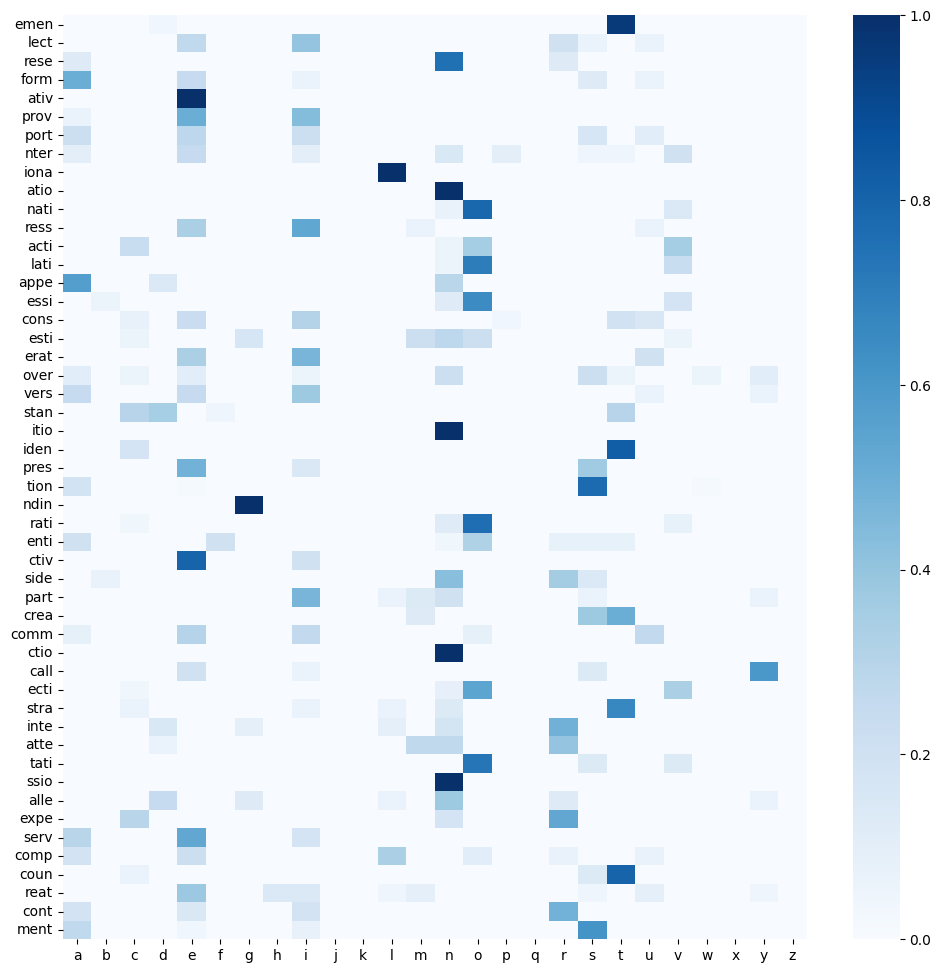

In [28]:
# filter out the prefixes with '%'
prefix_count_filtered = {prefix: prefix_count[prefix] for prefix in prefix_count if '%' not in prefix}

N = 50

# get the top N most common prefixes
topN = sorted(prefix_count_filtered, key=prefix_count_filtered.get, reverse=True)[:N]

# get the top N most common prefixes in the data
topN_data = {prefix: data[prefix] for prefix in topN}

generate_matrix(topN_data, N)

# **2. Probability Distributions**

Now, for the same top N prefixes, we can plot the probability distributions of the letters to get more details:

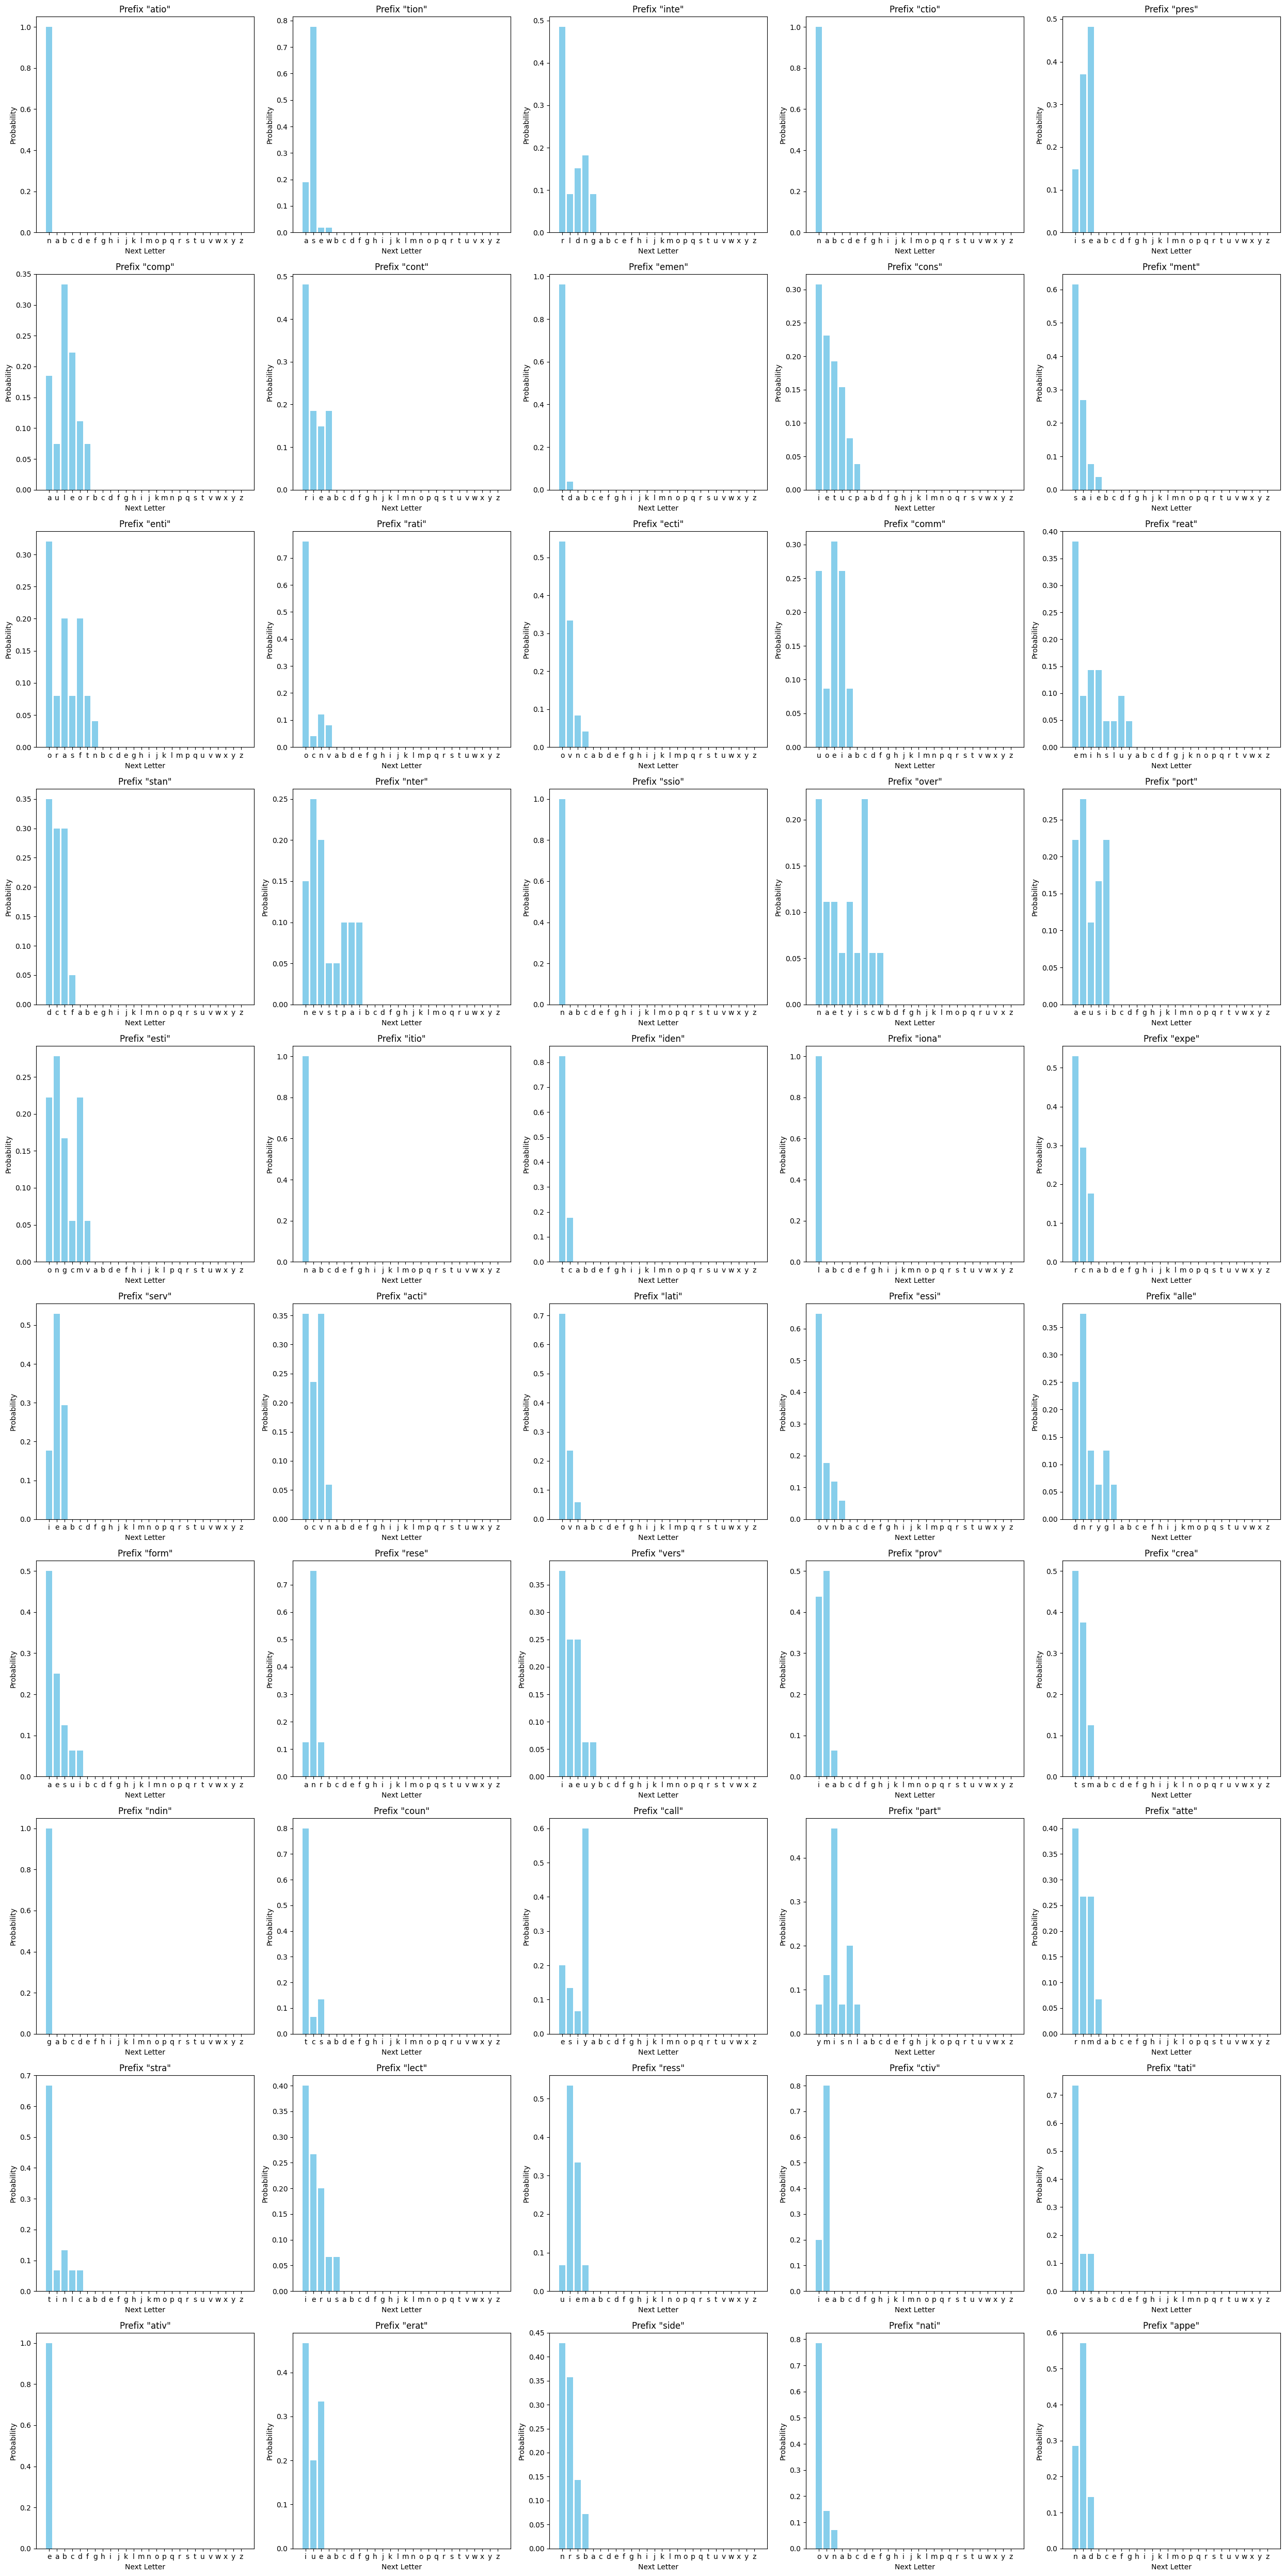

In [38]:
def plot_distribution(ax, prefix, probabilities):
    letters = list(probabilities.keys())
    probs = list(probabilities.values())
    
    ax.bar(letters, probs, color='skyblue')
    ax.set_xlabel('Next Letter')
    ax.set_ylabel('Probability')
    ax.set_title(f'Prefix "{prefix}"')

# Determine the number of prefixes to plot
num_prefixes = len(topN_data)
rows = 10
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(25, 50))
axes = axes.flatten()

# Plot each prefix's probability distribution in a grid
for i, prefix in enumerate(topN_data):
    if i >= rows * cols:
        break
    plot_distribution(axes[i], prefix, topN_data[prefix])

# Hide any unused subplots
for j in range(i+1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **3. Cummulative Distribution Functions**

Next, for the same top N prefixes, we can plot the CDF of the letters to get more details (probably the least useful):

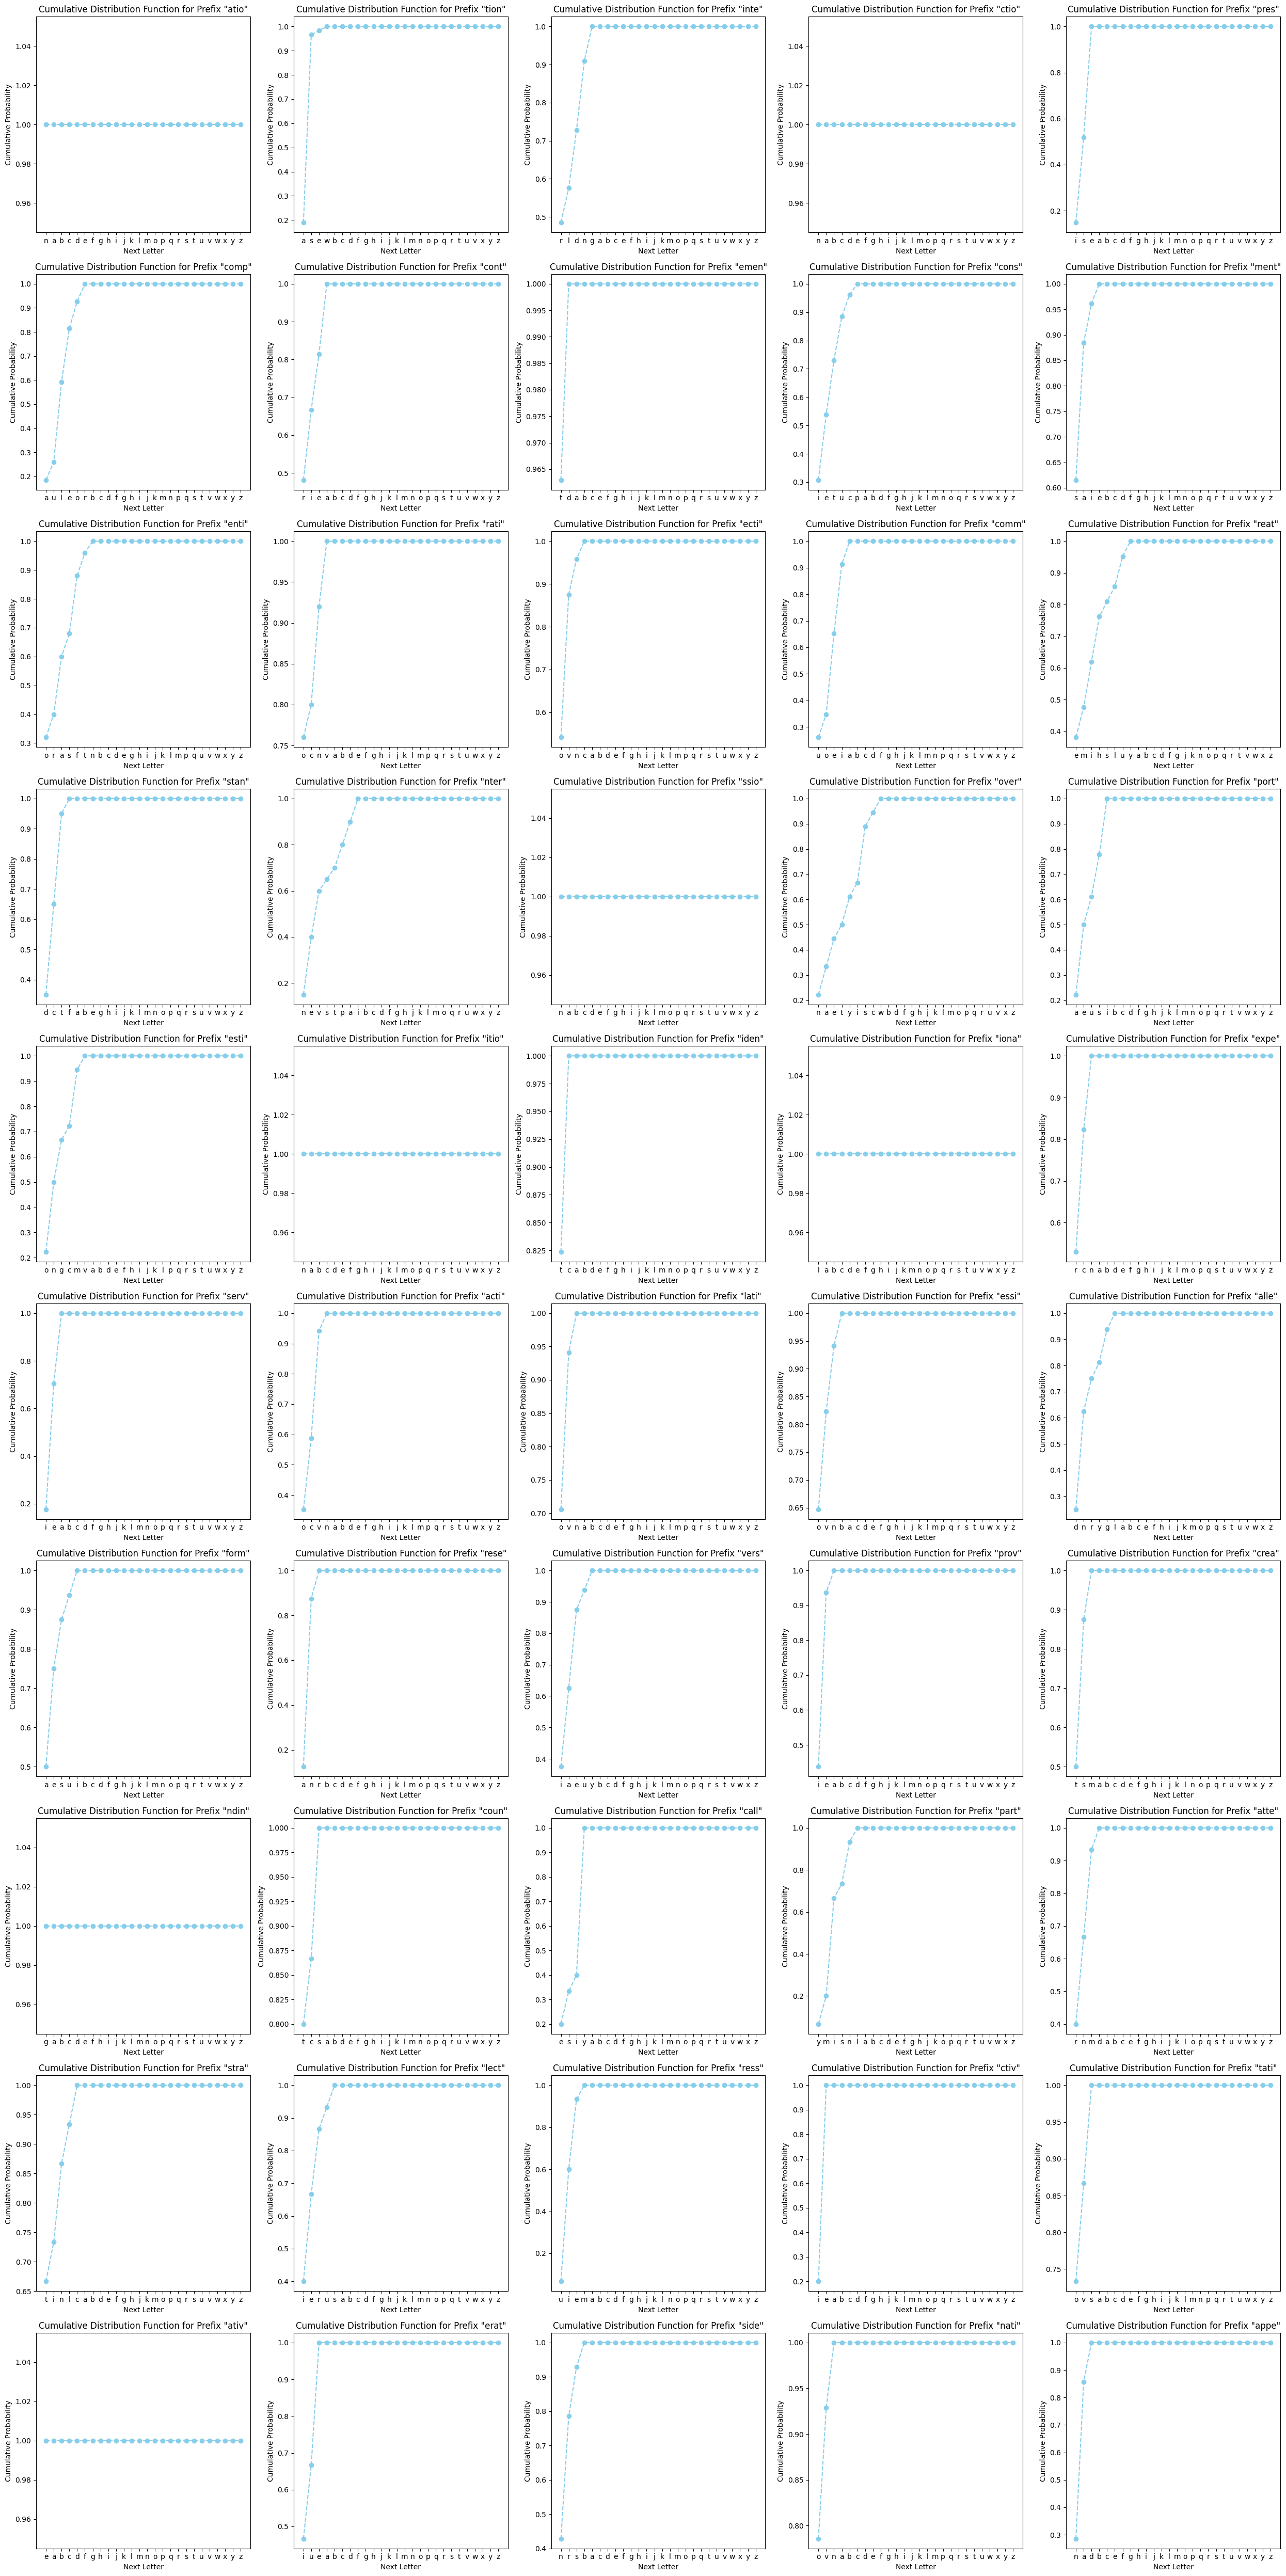

In [39]:
def plot_cdf(ax, prefix, probabilities):
    letters = list(probabilities.keys())
    probs = list(probabilities.values())
    cumulative_probs = np.cumsum(probs)
    
    ax.plot(letters, cumulative_probs, marker='o', linestyle='--', color='skyblue')
    ax.set_xlabel('Next Letter')
    ax.set_ylabel('Cumulative Probability')
    ax.set_title(f'Cumulative Distribution Function for Prefix "{prefix}"')

# Determine the number of prefixes to plot
num_prefixes = len(topN_data)
rows = 10
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(25, 50))
axes = axes.flatten()

# Plot each prefix's CDF in a grid
for i, prefix in enumerate(topN_data):
    if i >= rows * cols:
        break
    plot_cdf(axes[i], prefix, topN_data[prefix])

# Hide any unused subplots
for j in range(i+1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


This raises an interesting question: in average, how many letters do we need to have more than 90% of the occurences of a given prefix covered? Let's check!

In [42]:
def avg_letters_threshold(data, threshold):
    avg_letters = []
    for prefix in data:
        sum_prob = 0
        curr = 0

        for letter in sorted(data[prefix], key=lambda x: data[prefix][x], reverse=True): # sort by probability
            curr += 1
            sum_prob += data[prefix][letter]
            
            if sum_prob >= threshold: # if the sum of probabilities is greater than the threshold
                avg_letters.append(curr) # add the number of letters to the list
                break

    return sum(avg_letters) / len(avg_letters)

In [43]:
avg_letters_threshold(data, 0.9)

1.6027987082884823

# **4. Generating Sequences**

Another important test we are taking is, given the probability table we already generated, what are the words it automatically creates just using the top prediction for the last prefix?

For this experiment, we are creating 10 letter sequences starting with each letter of the alphabet, always taking the next letter to be the one with the highest probability.

In [27]:
def generate_sequence(letter, length=10):
    sequence = r'%%%' + letter
    for _ in range(length):
        if sequence[-4:] not in data:
            return sequence
        candidates = data[sequence[-4:]]
        sequence += max(candidates, key=lambda x: candidates[x])
    return sequence

print("Generated Sequences:\n")
for letter in 'abcdefghijklmnopqrstuvwxyz':
    print(generate_sequence(letter))



Generated Sequences:

%%%announced
%%%believed
%%%controllect
%%%designifica
%%%experiendsh
%%%factors
%%%grandom
%%%holdiers
%%%interested
%%%journaliste
%%%kinds
%%%links
%%%markets
%%%newspaperso
%%%operationsh
%%%proved
%%%quite
%%%responsiden
%%%statements
%%%themes
%%%university
%%%visitorican
%%%walked
%%%x
%%%yourself
%%%zone
